# Simulating Diffraction plots : an attempt
I was taught diffraction at uni last autumn. I found the subject interesting, but some of the calculations timeconsuming, so I thought trying to program it could be a way to go. Doing this project has made me appreciate the math behind it more, and there is still lots more to learn and implement.
Still a work in progress.

### My goals for the project are:
- To simulate simple crystals, firstly cubic, then non-cubic, to 
- Consolidate my diffraction knowledge and gain greater understanding of the subject

### This far I have learnt
- How to use Itertools to make combinations and permutations
- How to use complex numbers in Python

## Libraries used

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

## Find lattice spacing in reciprocal space

In [2]:
def findReciprocalBasis(a, b, c):
    "Generates basis vectors in reciprocal space based on a set of basis/lattice vectors, a b c are numpy arrays"
    V = np.cross(a, b)@c #volume of unit cell
    ar = 2*np.pi*np.cross(b, c)/V #a reciprocal
    br = 2*np.pi*np.cross(c, a)/V
    cr = 2*np.pi*np.cross(a, b)/V
    reciprocalBasis = np.array([ar, br, cr])
    
    return reciprocalBasis

In [3]:
def reciprocalVector(reciprocalBasis, h, k, l):
    "gives a reciprocal vector G based on lattice plane indecies. h k l are int"
    G = h*reciprocalBasis[0] + k*reciprocalBasis[1] + l*reciprocalBasis[2]
    return G

In [4]:
def dSpacing(G):
    "Takes reciprocal lattice vector G to return interplanarspacing d. G should be a np array"
    G = np.array(G) #to make sure the datatype is compatible
    d = 2*np.pi/sum(G**2)**(1/2)
    return d

## Generating all planes up to (555)
My goal is to get this to work with non-cubic crystals too, so (100) =/= (010) necesarily. Therefore all different combinations are generated using the itertools library

In [5]:
#generates a list of all planes up to (555) using the itertools library
productObject = itertools.product("012345", repeat = 3)
productList = list(productObject)
productList.remove(('0','0','0')) #as this is not a proper miller plane

## Figure out structure factor

There will be systematic abscences where $ F_{h k l} = 0 $

no need for abscence rules as structure factor will be determined to be 0 if absent

In [6]:
def structureFactor(lp, plane):
    "lp is list of lattice points/motif in crystal, plane is a place in the crystal"
    F_hkl = 0
#     h = N[0]
#     k = N[1]
#     l = N[2]
    for i in lp:
        F_hkl += np.e**(2*np.pi*1j*(int(plane[0])*i[0] + int(plane[1])*i[1] + int(plane[2])*i[2]))
    
    return F_hkl

## Different functions to figure out peak positions

In [7]:
# using Bragg's law wl = 2d_hklsin(theta)
def find2theta(plane, reciprocalBasis, wl = 0.154):
    "finds the 2theta position of a peak given its origin plane, interplanar spacing, and source wavelength (in nm)"
    G = reciprocalVector(reciprocalBasis, int(plane[0]), int(plane[1]), int(plane[2]))
    d = dSpacing(G)
    if wl/(2*d) > 1:
        return 0
    twoTheta = 2*np.math.asin(wl/(2*d))*180/np.pi
    return twoTheta

In [8]:
#finds the 2theta peaks
def findPeaks(lp, listOfPlanes):
    "Finds the peaks and structure factors of planes present in a diffraction plot for the latticepoints in the unit cell and planes considered"
    peaks = []
    structureFactors = []

    for i in listOfPlanes:
        dummy = structureFactor(lp, i)
        if (dummy.real**2 + dummy.imag**2)**(1/2) < 10**(-10):
            continue
        else:
            peaks.append(i)
            structureFactors.append(dummy)
            
    return (peaks, structureFactors)

In [9]:
def findThetaPositions(peaks, reciprocalBasis):
    "Gives list of 2theta positions for a given list of peaks and the reciprocal basis of the crystal system"
    positions = []
    for i in peaks:
        dummy = find2theta(i, reciprocalBasis)
        if dummy == 0:
            continue
        positions.append(dummy)
    return positions

In [10]:
def findDspacing(peaks, reciprocalBasis):
    "Finds the expected d-spacing of a material based on a given list of peaks and the reciprocal basis of the crystal system"
    dPositions = []
    for peak in peaks:
        G = reciprocalVector(reciprocalBasis, int(peak[0]), int(peak[1]), int(peak[2]))
        d = dSpacing(G)
        dPositions.append(d)
    return dPositions

## Functions to plot the simulated data

In [11]:
def twoThetaPlot(positions, y):
    "Creates a 2theta plot based on an x and y array"
    #the 2theta plot
    plt.bar(positions, y)

    #creates axis titles
    plt.xlabel('2θ / deg')
    plt.ylabel('relative counts')

    #gives titles to plot
    plt.title('Diffraction plot')

    plt.tight_layout()

In [12]:
def dSpacingPlot(dPositions, y):
    "Provides a d-spacing diffraction plot based on x and y"
    #the d spacing plot
    plt.scatter(dPositions, y)

    #creates axis titles
    plt.xlabel('d-spacing / nm')
    plt.ylabel('relative counts')

    #gives titles to plot
    plt.title('Diffraction plot')

    plt.tight_layout()

## Function combining all of the above to simulate results

In [13]:
def generatePlots(lp, a, b, c, possiblePlanes, dPlot = False):
    "generates a plot of peaks at 2theta or against dspacing"
    reciprocalBasis = findReciprocalBasis(a, b, c)
    peaks = findPeaks(lp, possiblePlanes)[0]
    if dPlot == False:
        positions = findThetaPositions(peaks, reciprocalBasis)
        y = [1 for i in range(len(positions))]
        ThetaPlot = twoThetaPlot(positions, y)
    else:
        #this dspacing still needs some work
        dPositions = findDspacing(peaks, reciprocalBasis)
        y = [1 for i in range(len(dPositions))]
        dSpacingPlot(dPositions, y)
    return
    

## Lets test it!
Below the generatePlots function is tested on a range of different crystals including:
- CsCl    : Simple cubic
- NaCl    : FCC rocksalt structure
- Diamond : FCC diamond structure 
- Rutile  : Body Centered Tetragonal (I think)

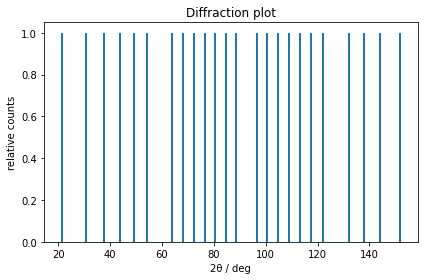

In [14]:
#lattice parameter / a float value given in nm
#for CsCl
a = np.array([0.4127, 0, 0])
b = np.array([0, 0.4127, 0])
c = np.array([0, 0, 0.4127])
##lattice points / list of all lattice point
lp = [(0, 0, 0)]

generatePlots(lp, a, b, c, productList, dPlot = False)

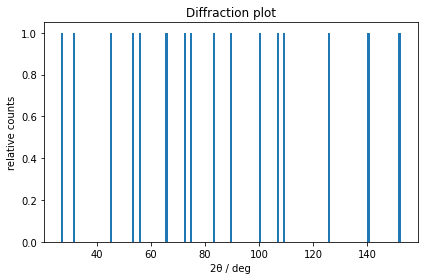

In [15]:
#for NaCl
a = np.array([0.5667, 0, 0])
b = np.array([0, 0.5667, 0])
c = np.array([0, 0, 0.5667])
lp = [(0, 0, 0), (1/2, 1/2, 0), (1/2, 0, 1/2), (0, 1/2, 1/2)]

generatePlots(lp, a, b, c, productList, dPlot = False)

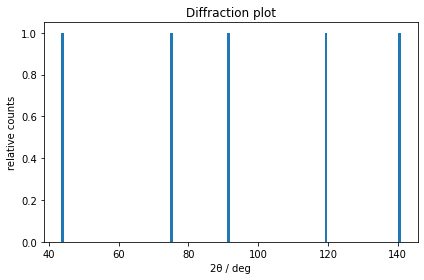

In [16]:
# for diamond
a = np.array([0.3567, 0, 0])
b = np.array([0, 0.3567, 0])
c = np.array([0, 0, 0.3567])
lp = [(0, 0, 0), (1/2, 1/2, 0), (1/2, 0, 1/2), (0, 1/2, 1/2), (1/4, 1/4, 1/4), (3/4, 3/4, 1/4), (3/4, 1/4, 3/4), (1/4, 3/4, 3/4)]

generatePlots(lp, a, b, c, productList, dPlot = False)

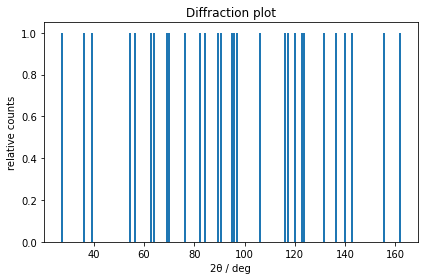

In [17]:
# for rutile (not successful)
a = np.array([0.4594, 0, 0])
b = np.array([0, 0.4594, 0])
c = np.array([0, 0, 0.2959])
lp = [(0, 0, 0), (1/2, 1/2, 1/2)]

generatePlots(lp, a, b, c, productList, dPlot = False)

## Ideas for the future
- Implement scattering factor into structure factor to get peaks of arying height
- Implement a function to draw a bellcurve instead of relying on bar plots
- Test out on more crystal systems, and get it properly working with tetragonal systems